<a href="https://colab.research.google.com/github/SamAniedi/cat_dog_classification_CNN/blob/main/CNN_Image_classification_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
train_dir = r"C:\Users\saman\OneDrive\Desktop\Machine Learning Files\cats_and_dogs_small\train"
validation_dir = r"C:\Users\saman\OneDrive\Desktop\Machine Learning Files\cats_and_dogs_small\validation"
test_dir = r"C:\Users\saman\OneDrive\Desktop\Machine Learning Files\cats_and_dogs_small\test"

In [ ]:
import tensorflow as tf
from tensorflow import keras

C:\Users\saman\.conda\envs\tensorflowenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saman\.conda\envs\tensorflowenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saman\.conda\envs\tensorflowenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saman\.conda\envs\tensorflowenv\lib\site-packages

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python.ops.gen_array_ops import reshape
# generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator =  train_datagen.flow_from_directory(
    train_dir,
    target_size= (150,150),
    batch_size = 20,
    class_mode = "binary"
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras.backend import binary_crossentropy
from keras import optimizers

# RMSprop have a little advantage of sgd while performing image processing
model.compile(loss = binary_crossentropy,
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics = ["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# for using image_data_generator we have to use .fit_generator
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data= validation_generator,
    validation_steps= 50)


Epoch 1/20
100/100 [==============================] - 92s 916ms/step - loss: 0.6882 - acc: 0.5520 - val_loss: 0.6659 - val_acc: 0.6270
Epoch 2/20
100/100 [==============================] - 92s 924ms/step - loss: 0.6556 - acc: 0.6170 - val_loss: 0.6769 - val_acc: 0.6380
Epoch 3/20
100/100 [==============================] - 89s 889ms/step - loss: 0.6057 - acc: 0.6645 - val_loss: 0.6495 - val_acc: 0.6730
Epoch 4/20
100/100 [==============================] - 89s 888ms/step - loss: 0.5587 - acc: 0.7110 - val_loss: 0.7373 - val_acc: 0.6510
Epoch 5/20
100/100 [==============================] - 91s 906ms/step - loss: 0.5308 - acc: 0.7320 - val_loss: 0.6954 - val_acc: 0.6810
Epoch 6/20
100/100 [==============================] - 97s 970ms/step - loss: 0.5025 - acc: 0.7485 - val_loss: 0.5333 - val_acc: 0.6930
Epoch 7/20
100/100 [==============================] - 102s 1s/step - loss: 0.4804 - acc: 0.7710 - val_loss: 0.4601 - val_acc: 0.7080
Epoch 8/20
100/100 [==============================] - 10

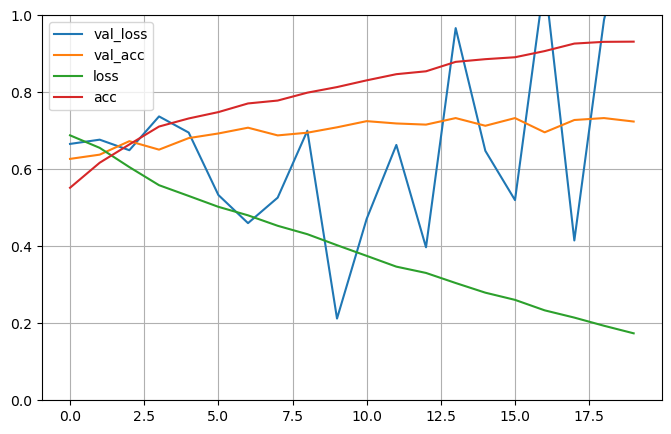

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
from keras import backend as k

k.clear_session()

In [ ]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2, # moving left to right by 20% of the total value
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)
# Training the model will be done with train_datagen, so there is no need to add the transformation parameters to the validation_datagen/set

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Creating the model architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [ ]:
# RMSprop have a little advantage of sgd while performing image processing
model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics = ["acc"])

In [ ]:
# for using image_data_generator we have to use .fit_generator
history = model.fit(
    train_generator,
    steps_per_epoch =len(train_generator),
    epochs = 100,
    validation_data= validation_generator,
    validation_steps= 50)

Epoch 1/100
63/63 [==============================] - 124s 2s/step - loss: 0.6943 - acc: 0.5175 - val_loss: 0.6790 - val_acc: 0.5704
Epoch 2/100
63/63 [==============================] - 112s 2s/step - loss: 0.6850 - acc: 0.5425 - val_loss: 0.7249 - val_acc: 0.5019
Epoch 3/100
63/63 [==============================] - 114s 2s/step - loss: 0.6782 - acc: 0.5655 - val_loss: 0.7181 - val_acc: 0.5539
Epoch 4/100
63/63 [==============================] - 127s 2s/step - loss: 0.6744 - acc: 0.5710 - val_loss: 0.6190 - val_acc: 0.6063
Epoch 5/100
63/63 [==============================] - 115s 2s/step - loss: 0.6576 - acc: 0.5980 - val_loss: 0.6044 - val_acc: 0.6402
Epoch 6/100
63/63 [==============================] - 118s 2s/step - loss: 0.6449 - acc: 0.6355 - val_loss: 0.5600 - val_acc: 0.6572
Epoch 7/100
63/63 [==============================] - 122s 2s/step - loss: 0.6250 - acc: 0.6460 - val_loss: 0.5595 - val_acc: 0.6516
Epoch 8/100
63/63 [==============================] - 118s 2s/step - loss: 0.

63/63 [==============================] - 58s 920ms/step - loss: 0.4610 - acc: 0.7765 - val_loss: 0.3264 - val_acc: 0.7817
Epoch 63/100
63/63 [==============================] - 57s 899ms/step - loss: 0.4692 - acc: 0.7775 - val_loss: 0.4608 - val_acc: 0.7912
Epoch 64/100
63/63 [==============================] - 58s 915ms/step - loss: 0.4626 - acc: 0.7715 - val_loss: 0.3169 - val_acc: 0.7887
Epoch 65/100
63/63 [==============================] - 56s 896ms/step - loss: 0.4621 - acc: 0.7740 - val_loss: 0.4857 - val_acc: 0.7773
Epoch 66/100
63/63 [==============================] - 57s 912ms/step - loss: 0.4651 - acc: 0.7710 - val_loss: 0.5995 - val_acc: 0.7957
Epoch 67/100
63/63 [==============================] - 56s 893ms/step - loss: 0.4478 - acc: 0.7830 - val_loss: 0.3192 - val_acc: 0.7931
Epoch 68/100
63/63 [==============================] - 57s 911ms/step - loss: 0.4604 - acc: 0.7845 - val_loss: 0.5065 - val_acc: 0.7513
Epoch 69/100
63/63 [==============================] - 57s 898ms/step

In [ ]:
model.save("project_cnn.h5")

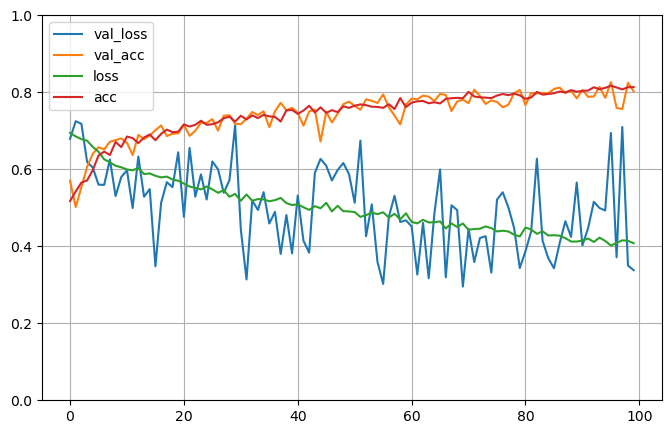

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()